In [37]:
#Import Library yang akan digunakan
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

In [41]:
#melihat ukuran tabel dataset (jumlah baris dan kolom)
data_tj.shape

(227, 6)

In [57]:
#Upload Dataset from G Drive
#add dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

#baca file dataset
data_tj = pd.read_csv('/content/drive/MyDrive/Training/datasets/data-penumpang-bus-transjakarta-desember-2021.csv')

data_tj

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,12,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,43967
1,2021,12,Mikrotrans,JAK.85,Bintara - Cipinang Indah,40103
2,2021,12,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,59193
3,2021,12,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,70475
4,2021,12,Mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,77697
...,...,...,...,...,...,...
222,2021,10,BRT,6,Ragunan - Dukuh Atas 2,401232
223,2021,10,BRT,5,Kampung Melayu - Ancol,513138
224,2021,10,BRT,4,Pulo Gadung 2 - Tosari,319411
225,2021,10,BRT,3,Kalideres - Pasar Baru,465124


In [58]:
#pengecekan terhadap data null pada dataset
data_tj.isnull().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

In [59]:
#pengecekan terhadap data N/A pada dataset
data_tj.isna().sum()

tahun               0
bulan               0
jenis               0
kode_trayek         0
trayek              0
jumlah_penumpang    0
dtype: int64

In [44]:
#pengecekan data duplikat pada dataset

data_tj.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
222     True
223     True
224    False
225    False
226     True
Length: 227, dtype: bool

In [45]:
#pengecekan statistik dataset
data_tj.describe()

,tahun,bulan,jumlah_penumpang
count,227.0,227.000000,2.270000e+02
mean,2021.0,11.352423,1.267386e+05
std,0.0,0.763684,1.936803e+05
min,2021.0,10.000000,0.000000e+00
25%,2021.0,11.000000,2.278600e+04
50%,2021.0,12.000000,6.827500e+04
75%,2021.0,12.000000,1.065060e+05
max,2021.0,12.000000,1.131439e+06


In [61]:
#menghapus kolom (tidak digunakan dalam perhitungan dan visualisasi)
data_tj = data_tj.drop(['kode_trayek','tahun'], axis=1)
data_tj

,bulan,jenis,trayek,jumlah_penumpang
0,12,Mikrotrans,Terminal Tanjung Priok - Ancol Barat,43967
1,12,Mikrotrans,Bintara - Cipinang Indah,40103
2,12,Mikrotrans,Terminal Kampung Melayu - Kapin Raya,59193
3,12,Mikrotrans,Rawa Buaya - Rawa Kompeni,70475
4,12,Mikrotrans,Tanjung Priok - Jembatan Item,77697
...,...,...,...,...
222,10,BRT,Ragunan - Dukuh Atas 2,401232
223,10,BRT,Kampung Melayu - Ancol,513138
224,10,BRT,Pulo Gadung 2 - Tosari,319411
225,10,BRT,Kalideres - Pasar Baru,465124


array([[<Axes: title={'center': 'bulan'}>,
        <Axes: title={'center': 'jumlah_penumpang'}>]], dtype=object)

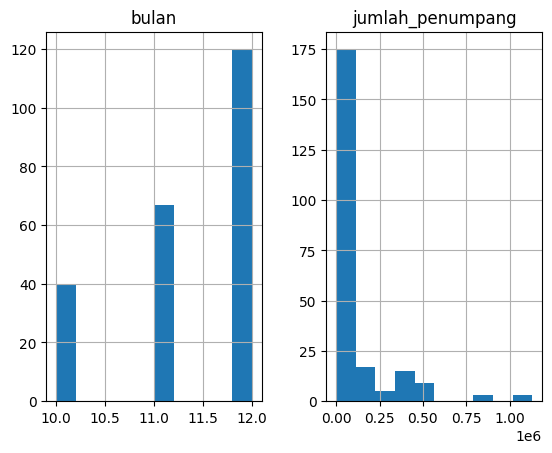

In [63]:
#menampilkan Histogram
data_tj.hist()

<Axes: >

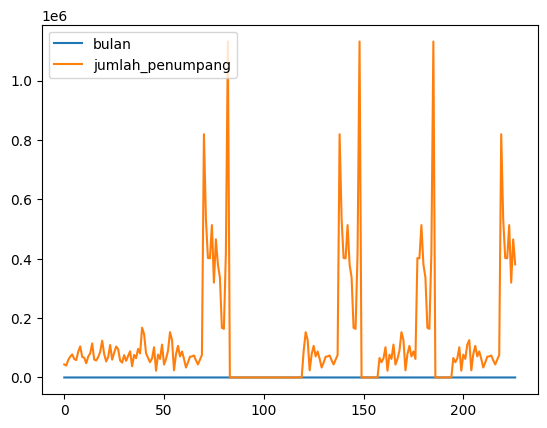

In [64]:
#menampilkan Plot
data_tj.plot()

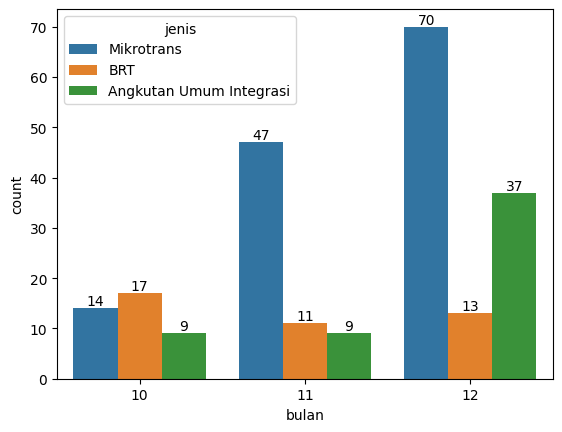

In [69]:
g = sns.countplot(x='bulan', hue='jenis', data=data_tj)
for container in g.containers:
    g.bar_label(container)

<ipython-input-72-7771d9e9e4ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_tj.corr()


Text(0.5, 1.0, 'Correlation Matrix')

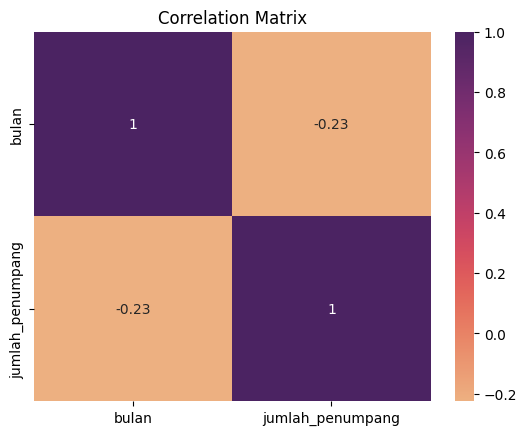

In [72]:
corr_matrix = data_tj.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')

plt.title('Correlation Matrix')

In [73]:
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [121]:
x = data_tj.iloc[:,1:3001]
x

y = data_tj.iloc[:, -1].values
y

array([  43967,   40103,   59193,   70475,   77697,   62086,   58622,
         86917,  104712,   69365,   66235,   47929,   70382,   81467,
        114592,   60415,   57178,   68275,   86276,  124003,   79329,
         53972,   68695,  109328,   59932,   82948,  104353,   95485,
         57059,   49918,   75170,   56049,   71809,   88277,   37850,
         75763,   64986,   96339,   80726,  167782,  146329,   81435,
         65717,   51285,   64243,  101816,   22786,   76970,   62477,
        110771,   43349,   62285,   90254,  152585,  125777,   24193,
         78580,  106506,   70986,   87568,   62581,   33555,   50409,
         69904,   70907,   74100,   57870,   43991,   59985,   75915,
        819178,  533221,  402368,  401232,  513138,  319411,  465124,
        380760,  337233,  167399,  163776,  419198, 1131439,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       8,
             0,     

In [119]:
logistic = SGDClassifier(loss="log")
print(logistic.get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [123]:
data_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bulan             227 non-null    int64 
 1   jenis             227 non-null    object
 2   trayek            227 non-null    object
 3   jumlah_penumpang  227 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.2+ KB
